In [16]:
pip install tensorflow opencv-python matplotlib


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\acer\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [17]:
!pip list


Package                      Version
---------------------------- --------------
absl-py                      2.1.0
anyio                        4.4.0
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    2.4.1
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.2.0
Babel                        2.15.0
beautifulsoup4               4.12.3
bleach                       6.1.0
certifi                      2024.7.4
cffi                         1.16.0
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.2.1
cycler                       0.12.1
debugpy                      1.8.2
decorator                    5.1.1
defusedxml                   0.7.1
exceptiongroup               1.2.1
executing                    2.0.1
fastjsonschema               2.20.0
flatbuffers                  24.3

You should consider upgrading via the 'C:\Users\acer\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [18]:
import tensorflow as tf
import os
from matplotlib import pyplot as plt

In [19]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
   tf.config.experimental.set_memomry_growth(gpu,True)

In [20]:
import cv2
import imghdr

In [21]:
image_exts=['jpeg','jpg','bmp','png']

In [22]:
data_dir=' D:\img_classify\data'

In [23]:
data_dir = r'D:\img_classify\data'
if os.path.exists(data_dir):
    files = os.listdir(data_dir)
    print("Files in the directory:", files)
else:
    print(f"Directory '{data_dir}' does not exist.")

Files in the directory: ['happy', 'sad']


In [24]:
image_exts[3]

'png'

In [25]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [26]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [27]:
import numpy as np
from matplotlib import pyplot as plt

In [28]:
data= tf.keras.utils.image_dataset_from_directory('data')

Found 142 files belonging to 2 classes.


In [29]:
data_iterator = data.as_numpy_iterator()

In [30]:
#get another batch from the iterator
batch= data_iterator.next()

In [31]:
# images represented as nummpy arrays
batch[0].shape

(32, 256, 256, 3)

In [32]:
# Class 1= sad people
# Class 0= happy people
batch[1]

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1])

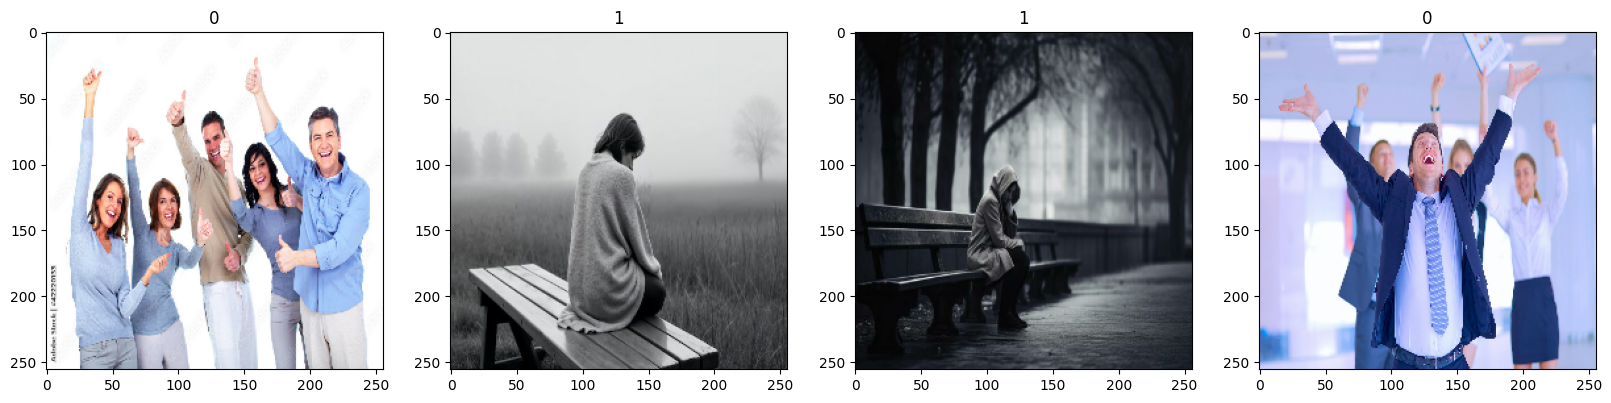

In [72]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [124]:
data = data.map(lambda x,y:(x/255,y))

In [125]:
scaled_iterator = data.as_numpy_iterator()

In [126]:
batch = scaled_iterator.next()

In [127]:
batch[0].min()

0.0

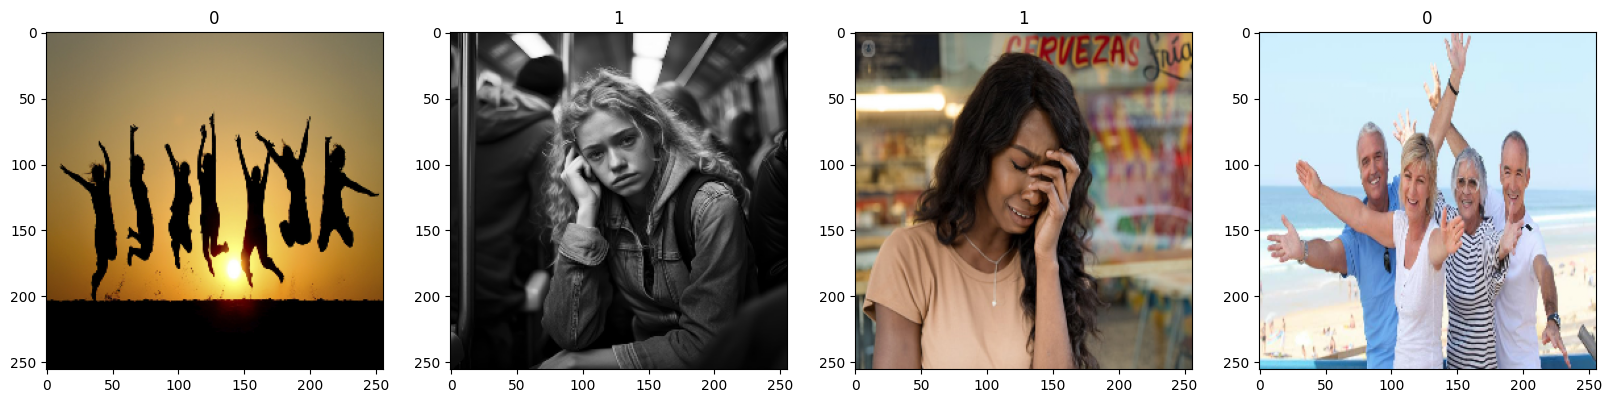

In [128]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [129]:
len(data)

5

In [145]:
train_size =int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [146]:
train_size+val_size+test_size

5

In [147]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test= data.skip(train_size+ val_size).take(test_size)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D , Flatten, Dense

In [38]:
model = Sequential()

In [39]:
model.add(Conv2D(16, (3,3), strides=1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())


model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [164]:
logdir='logs'

In [165]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [166]:
hist = model.fit(train, epochs=20 , validation_data= val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.5052 - loss: 1.0996 - val_accuracy: 0.3750 - val_loss: 0.9699
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.5664 - loss: 0.7815 - val_accuracy: 0.6562 - val_loss: 0.5682
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.6341 - loss: 0.7184 - val_accuracy: 0.5625 - val_loss: 0.6439
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.7318 - loss: 0.6074 - val_accuracy: 0.8125 - val_loss: 0.6262
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.8385 - loss: 0.5922 - val_accuracy: 0.8750 - val_loss: 0.5860
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8984 - loss: 0.5395 - val_accuracy: 0.6250 - val_loss: 0.5472
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.8073 - loss: 0.4609 - val_accuracy: 0.7500 - val_loss: 0.4646
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.8424 - loss: 0.4199 - val_accuracy: 0.9062 - val_loss: 0.3949
Epoch 9/20
3

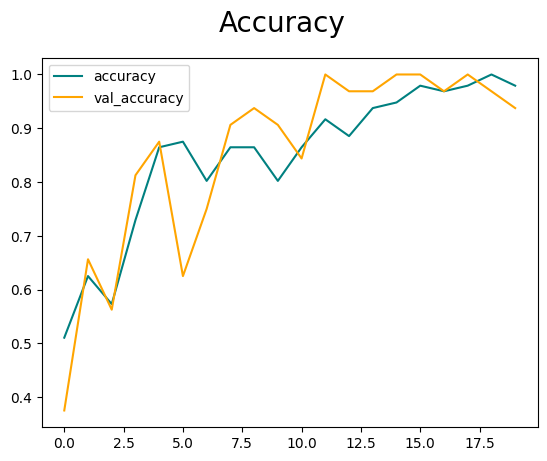

In [169]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

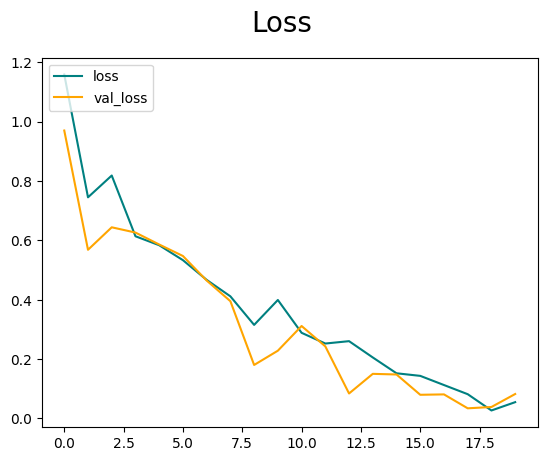

In [170]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [171]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [173]:
pre = Precision()
re =Recall()
acc= BinaryAccuracy()

In [174]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


In [179]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()} ,Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0 ,Accuracy:1.0


In [8]:
import cv2
from matplotlib import pyplot as plt

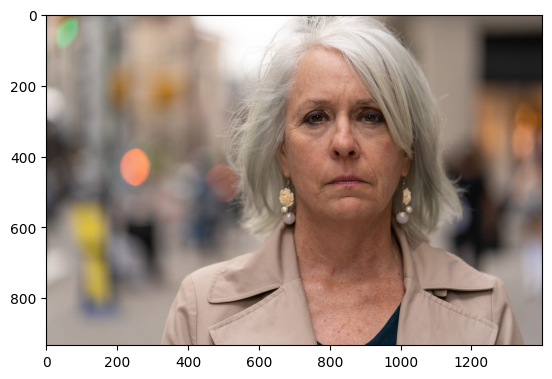

In [19]:
img_path = 'sad.jpg'
img = cv2.imread('sad.jpg')
if img is None:
    print(f"Error: Unable to open image file '{img_path}'. Please check the file path and format.")
else:
 plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
 plt.show()

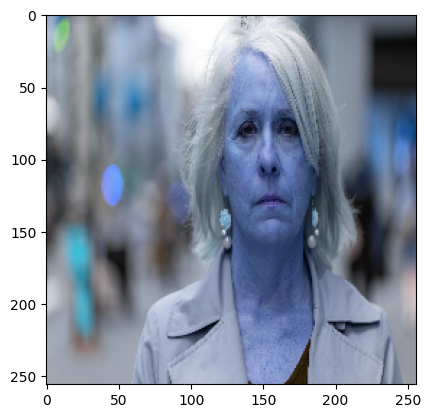

In [22]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [29]:
resize.shape

TensorShape([256, 256, 3])

In [33]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [42]:
yhat =model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


In [43]:
yhat

array([[0.50401545]], dtype=float32)

In [45]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [27]:
from tensorflow.keras.models import load_model

In [46]:
model.save(os.path.join('models','happysadmodels.h5'))

In [47]:
new_model = load_model(os.path.join('models','happysadmodels.h5'))

In [48]:
yhatnew =new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


In [50]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
